# Importing Libraries

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [129]:
data = pd.read_csv("Advertising.csv")

In [130]:
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [131]:
data = data.drop(columns=['Unnamed: 0'], axis = 1)

In [132]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [133]:
#the dataset has 200 rows and 4 columns and the target variable is sales

In [134]:
#datatypes of data
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

# Exploratory data analysis

In [135]:
#checking nul values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [136]:
#describe the data
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


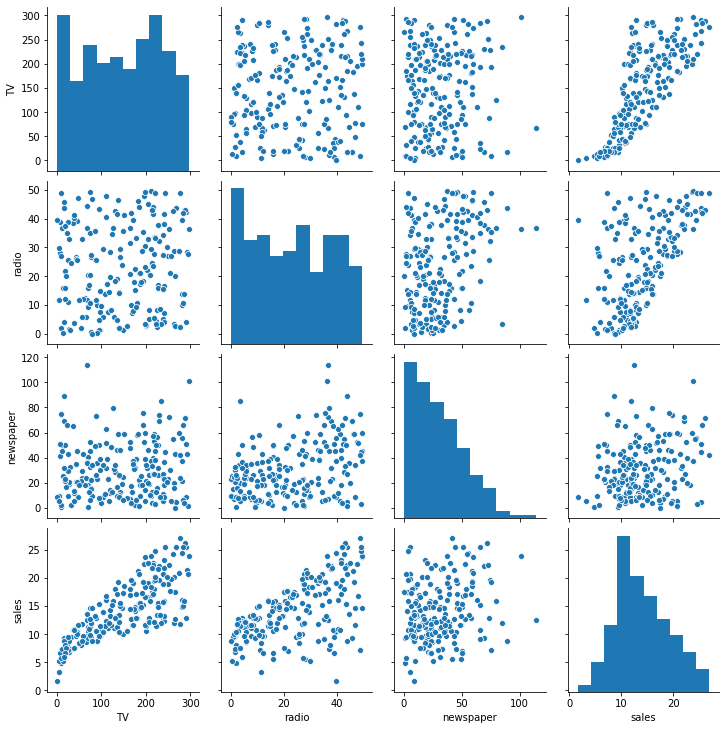

In [137]:
sns.pairplot(data)

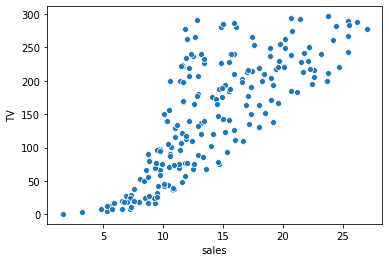

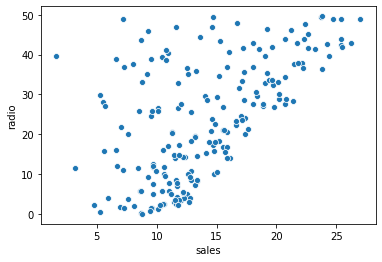

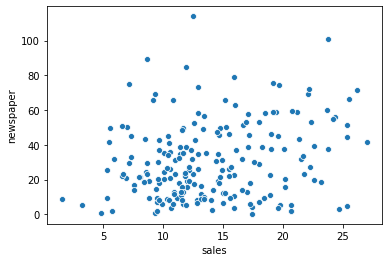

[(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f0e9578e1d0>),
 (None, <matplotlib.axes._subplots.AxesSubplot at 0x7f0e95511150>),
 (None, <matplotlib.axes._subplots.AxesSubplot at 0x7f0e9575b6d0>),
 (None, <matplotlib.axes._subplots.AxesSubplot at 0x7f0e95461b50>)]

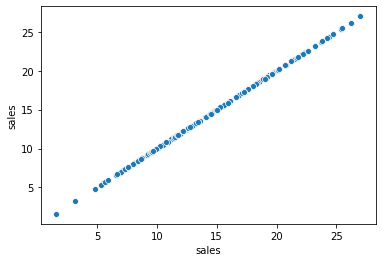

In [138]:
#Scatterplot for checking relation of features
[(plt.show(), sns.scatterplot(y = i, x = "sales",data = data)) for i in data]

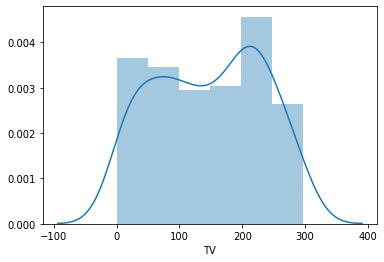

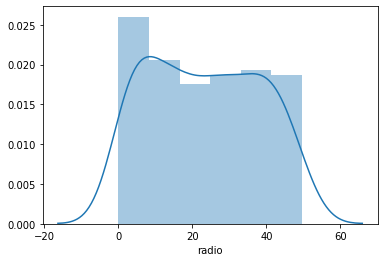

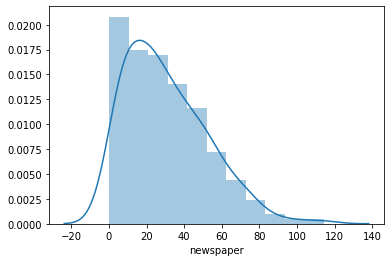

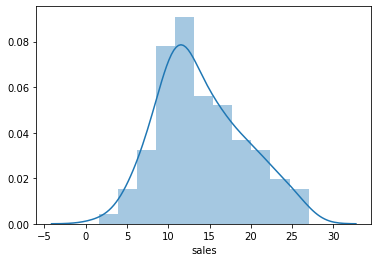

[(<matplotlib.axes._subplots.AxesSubplot at 0x7f0ea5f55050>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0e95394c50>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0e9530db50>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0e953a07d0>, None)]

In [140]:
#Dist plot for checking data distribution
[(sns.distplot(data[i]),plt.show())for i in data]

data distribution is fine so no need to sclae it to standard normal distribution

# Outlier handling

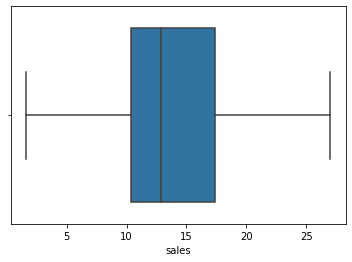

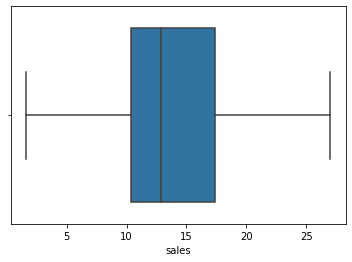

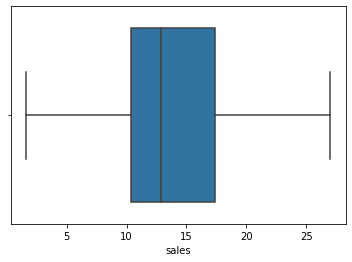

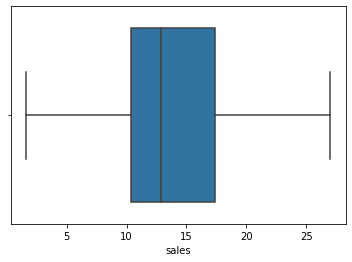

[(<matplotlib.axes._subplots.AxesSubplot at 0x7f0e9521a710>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0e951a0d10>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0e951022d0>, None),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0e950e5510>, None)]

In [141]:
#outlier detection and handling
[(sns.boxplot(data[i]), plt.show())for x in data]

# Correlation

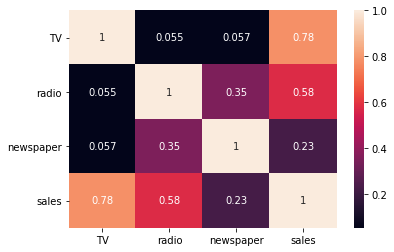

In [142]:
sns.heatmap(data.corr(), annot = True)

# Model creation

In [143]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

In [144]:
x = data.drop(["sales"], axis = 1)
y = data["sales"]

In [145]:
print(x.shape,y.shape)

(200, 3) (200,)


In [146]:
models = []
models.append(("linear_regression", LinearRegression()))
models.append(("lasso", Lasso()))
models.append(("ridge", Ridge()))
models.append(("dec", DecisionTreeRegressor()))

names = []
results = []

for name, model in models:
    
    kfold = KFold(n_splits= 10, random_state= 100)
    model_result = cross_val_score(model, x, y, cv=5, scoring="r2")
    
    results.append(model_result)
    names.append(name)
    
    msg = '%s: %f, (%f)' % (name, model_result.mean(), model_result.std())
    print(msg)


linear_regression: 0.887106, (0.040341)
lasso: 0.888201, (0.038168)
ridge: 0.887107, (0.040338)
dec: 0.949763, (0.009442)


# creating Linear regression model

In [147]:
#divide into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 100, test_size = 0.30)

In [148]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(140, 3) (60, 3)
(140,) (60,)


score of model Linear_regression is: 89.2804847190598
[10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]
r2 score is : 0.9058622107532246
MAE : 1.0638483124072031




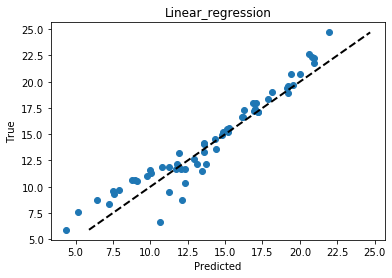

score of model DecisionTreeRegressor is: 100.0
[ 5.5 20.1 18.5 20.1 22.6 12.5 12.4 11.4 21.7 21.5 13.4 18.   8.1 14.7
  9.7  9.5 15.  12.6 16.9 12.9 17.  11.2 21.2 19.6 14.7 23.7 20.1 11.8
 19.2 15.9 12.5  9.9 11.  14.9  9.7 15.9  8.6 12.6 11.7 12.9 17.  14.7
 15.5 12.5 13.2  9.7  9.3 19.8 11.3  9.4 15.9 19.6 14.  18.5 18.9 11.6
  6.7  8.  14.7 14. ]
r2 score is : 0.9431905528401615
MAE : 0.8983333333333337




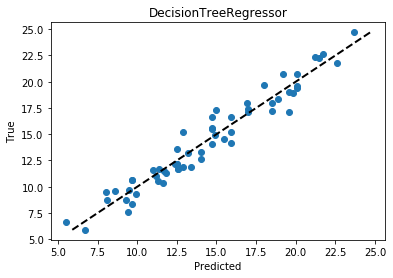

In [149]:


lr = LinearRegression()
dec = DecisionTreeRegressor()


model = []
model.append(('Linear_regression', LinearRegression()))
model.append(('DecisionTreeRegressor', DecisionTreeRegressor()))


for n, m in model:
    m.fit(x_train,y_train)
    print("score of model",n ,"is:", m.score(x_train,y_train)*100)
    predlr = m.predict(x_test)
    print(predlr)

    print("r2 score is :", r2_score(y_test, predlr))
    print("MAE :",mean_absolute_error(y_test, predlr))
    print("\n")

    plt.scatter(predlr, y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(n)
    plt.show()
    

# Saving our model

In [150]:
import joblib
joblib.dump(lr, "Linearmodel.obj")

['Linearmodel.obj']

In [151]:
joblib.dump(dec, "DecisionTreeRegressor.obj")

['DecisionTreeRegressor.obj']

In [152]:
model1 = joblib.load("Linearmodel.obj")
model2 = joblib.load("DecisionTreeRegressor.obj")

# Conclusion

In [153]:
print(model1.fit(x_train,y_train))
print(model2.fit(x_train,y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [154]:
#predicting with linear regression
a = np.array(y)
predicted =  np.array(model1.predict(x))
submission1 = pd.DataFrame({"linear_predicted": predicted}, index=range(len(a)))

In [155]:
#predicting with decision tree
b = np.array(y)
predicted =  np.array(model2.predict(x))
submission2 = pd.DataFrame({"Decisiontree_predicted": predicted}, index=range(len(a)))

In [156]:
predicted_data = pd.concat([submission1, submission2],axis=1)

In [157]:
predicted_data

,linear_predicted,Decisiontree_predicted
0,20.596594,22.1
1,12.339306,11.6
2,12.462983,9.3
3,17.641042,18.5
4,13.183941,12.9
...,...,...
195,5.153674,9.5
196,7.898979,9.5
197,12.487327,12.8
198,23.810037,25.5


In [158]:
Ad_data = pd.concat([data, predicted_data],axis=1)

In [159]:
Ad_data

,TV,radio,newspaper,sales,linear_predicted,Decisiontree_predicted
0,230.1,37.8,69.2,22.1,20.596594,22.1
1,44.5,39.3,45.1,10.4,12.339306,11.6
2,17.2,45.9,69.3,9.3,12.462983,9.3
3,151.5,41.3,58.5,18.5,17.641042,18.5
4,180.8,10.8,58.4,12.9,13.183941,12.9
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,5.153674,9.5
196,94.2,4.9,8.1,9.7,7.898979,9.5
197,177.0,9.3,6.4,12.8,12.487327,12.8
198,283.6,42.0,66.2,25.5,23.810037,25.5


In [160]:
Ad_data.to_csv("Advertisement_prediction.csv")